In [1]:
import keras_tuner as kt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df1=pd.read_csv(r"C:\Users\pc\Downloads\archive (2)\winequality-white.csv",sep=";")
df2=pd.read_csv(r"C:\Users\pc\Downloads\archive (2)\winequality-red.csv",sep=";")

In [5]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df = pd.merge(df1, df2, on='quality', how='inner', suffixes=('', '_drop'))
df = df.loc[:, ~df.columns.str.endswith('_drop')]

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
2,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
3,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
4,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2581645,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
2581646,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
2581647,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
2581648,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [9]:
df["quality"].value_counts()

quality
6    1402324
5     992217
7     175120
4       8639
8       3150
3        200
Name: count, dtype: int64

In [10]:
def qual(x):
    if x>=8:
        return 2
    elif x>5 and x<=7:
        return 1
    else:
        return 0

In [11]:
df["quality"]=df["quality"].apply(qual)

In [12]:
fv=df.iloc[::,0:11]
cv=df.iloc[::,-1]

In [13]:
fv.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8
2,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8
3,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8
4,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [14]:
cv.head()

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [16]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [17]:
x_traint=std.fit_transform(x_train)
x_testt=std.transform(x_test)

### RandomSearch

In [18]:
def f1(hp):
    model=Sequential()
    model.add(InputLayer(input_shape=(11,)))
    model.add(Dense(units=hp.Int("no of neuron for 1hl",min_value=3,max_value=100),activation=hp.Choice("1hl activation",values=["sigmoid","tanh","relu"])))
    model.add(Dense(units=hp.Int("no of neuron for 2hl",min_value=3,max_value=100),activation=hp.Choice("2hl activation",values=["sigmoid","tanh","relu"])))
    model.add(Dense(units=hp.Int("no of neuron for 3hl",min_value=3,max_value=100),activation=hp.Choice("3hl activation",values=["sigmoid","tanh","relu"])))
    model.add(Dense(units=3,activation="softmax"))
    model.compile(optimizer=hp.Choice("optimizer",values=["sgd","adagrad","adadelta","adam"]),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model
    

In [19]:
rs=kt.RandomSearch(f1,objective="val_loss",max_trials=3,directory="j7") #randomsearch object

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
rs.search(x_traint,y_train,validation_data=(x_testt,y_test),epochs=10)

Trial 3 Complete [00h 22m 30s]
val_loss: 0.01997516117990017

Best val_loss So Far: 0.01997516117990017
Total elapsed time: 01h 27m 01s


In [20]:
rs.get_best_hyperparameters()[0].values

{'no of neuron for 1hl': 78,
 '1hl activation': 'relu',
 'no of neuron for 2hl': 79,
 '2hl activation': 'relu',
 'no of neuron for 3hl': 9,
 '3hl activation': 'sigmoid',
 'optimizer': 'adam'}

In [21]:
rs.get_best_models(num_models=1)[0].summary()

C:\Users\routj\AppData\Roaming\Python\Python310\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 78)                  │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 79)                  │           6,241 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,927 (30.96 KB)

 Trainable params: 7,927 (30.96 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
rs.get_best_models(num_models=1)[0].compile(optimizer="sgd",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [23]:
hist=rs.get_best_models(num_models=1)[0].fit(x_traint,y_train,batch_size=30,epochs=50,validation_split=0.2)

Epoch 1/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 593s 11ms/step - accuracy: 0.9950 - loss: 0.0186 - val_accuracy: 0.9922 - val_loss: 0.0255
Epoch 2/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.9953 - loss: 0.0179 - val_accuracy: 0.9967 - val_loss: 0.0144
Epoch 3/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - accuracy: 0.9953 - loss: 0.0176 - val_accuracy: 0.9965 - val_loss: 0.0132
Epoch 4/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - accuracy: 0.9952 - loss: 0.0180 - val_accuracy: 0.9965 - val_loss: 0.0177
Epoch 5/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step - accuracy: 0.9953 - loss: 0.0179 - val_accuracy: 0.9947 - val_loss: 0.0163
Epoch 6/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9954 - loss: 0.0173 - val_accuracy: 0.9960 - val_loss: 0.0175
Epoch 7/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - accuracy: 0.9955 - loss: 0.0167 - val_accuracy: 0.9968 - val_loss: 0.0129
Epoch 8/50
55076/55076 ━━━━━━━━━━━━━━━━━━━━ 2069s 38ms/step - accur

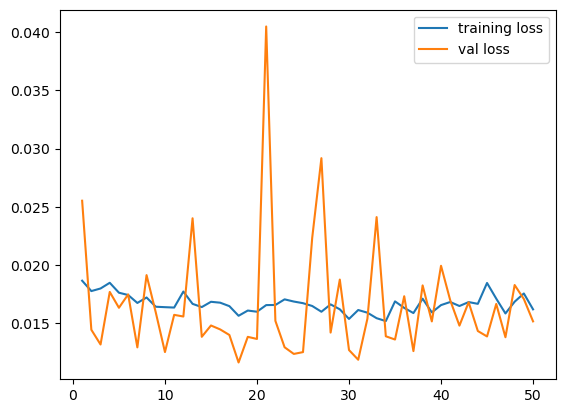

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),hist.history["loss"],label="training loss")
plt.plot(range(1,51),hist.history["val_loss"],label="val loss")
plt.legend()
plt.show()


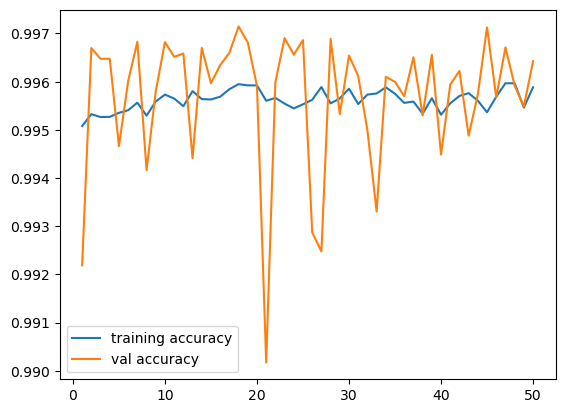

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),hist.history["accuracy"],label="training accuracy")
plt.plot(range(1,51),hist.history["val_accuracy"],label="val accuracy")
plt.legend()
plt.show()


### Hyperband

In [ ]:
def f1(hp):
    model=Sequential()
    model.add(InputLayer(input_shape=(5,)))
    co=0
    for layer in range(hp.Int("layers",min_value=3,max_value=100)):
        model.add(Dense(units=hp.Int("no of neurons {}".format(co),min_value=3,max_value=100),activation=hp.Choice("1hl activation",values=["sigmoid","tanh","relu"])))
        model.add(BatchNormalization())
        co+=1
    model.add(Dense(units=4,activation="softmax"))
    model.compile(optimizer=hp.Choice("optimizer",values=["sgd","adagrad","adadelta","adam"]),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [ ]:
hb=kt.Hyperband(f1,objective="val_loss",max_epochs=10,factor=3,directory="k1") #factor is saying how many model you want to remove

In [ ]:
hb.search(fv,cv,validation_split=0.1,epochs=5)

In [ ]:
rs.get_best_hyperparameters()[0].values

In [ ]:
rs.get_best_models(num_models=1)[0].summary()